"Quero identificar padrões e tendências para melhorar nossas decisões de marketing e direcionar nossos investimentos"


In [1]:
! pip install pandas


In [2]:
! pip install openpyxl

In [92]:
import pandas as pd 

# Buscando cada sheet dísponível na planilha
df_clientes = pd.read_excel('marketing.xlsx', sheet_name='clientes')
df_campanhas= pd.read_excel('marketing.xlsx', sheet_name='campanhas')
df_vendas= pd.read_excel('marketing.xlsx', sheet_name='vendas')
df_produtos= pd.read_excel('marketing.xlsx', sheet_name='produtos')



Quais são os segmentos mais rentáveis com base nos dados ? 

In [93]:
# Juntando a sheet de clientes com vendas 
clientes_vendas = pd.merge(df_clientes, df_vendas, left_on='id _cliente', right_on='id_vendas', how='inner')

# agrupando rentabilidade por localização
rentabilidade_geografica = clientes_vendas.groupby('localizacao_venda')['valor_venda'].sum().reset_index()

rentabilidade_geografica

,localizacao_venda,valor_venda
0,Belo Horizonte,1050
1,Brasília,900
2,Campinas,650
3,Curitiba,450
4,Fortaleza,650
5,Porto Alegre,750
6,Recife,750
7,Rio de Janeiro,950
8,Salvador,350
9,São Paulo,1100


In [5]:
! pip install matplotlib

Abaixo analisei o segmento geográfico, agrupando os valores somados por localização. 

O gráfico do matplotlib mostra qual região atualmente é mais lucrativa.

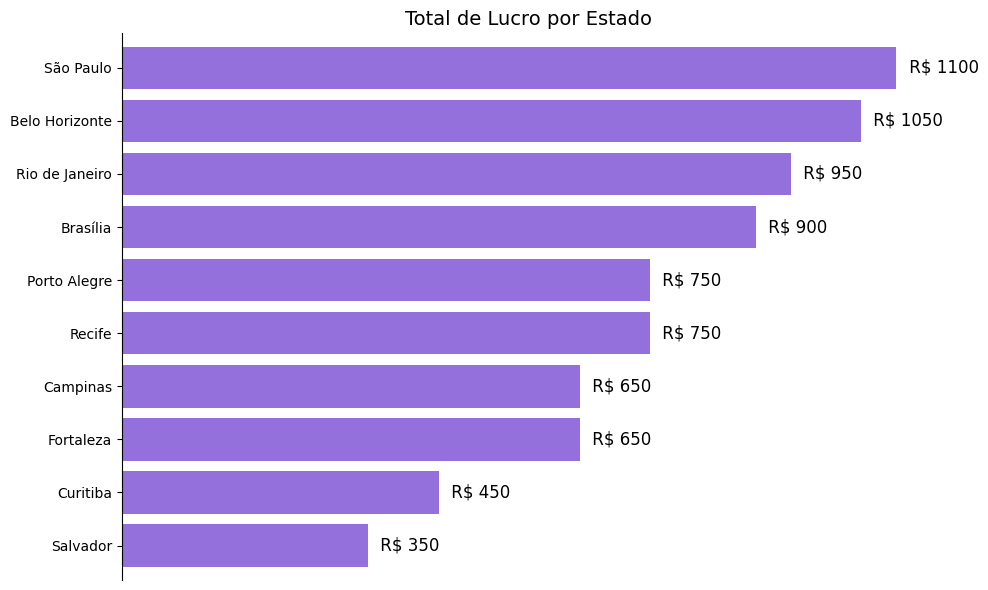

In [103]:
import matplotlib.pyplot as plt
rentabilidade_geografica = clientes_vendas.groupby('localizacao_venda')['valor_venda'].sum().reset_index()

# Ordenando por lucro
rentabilidade_geografica = rentabilidade_geografica.sort_values(by='valor_venda', ascending=True)

# Colocando a coluna localizacao_venda como índice
rentabilidade_geografica.set_index('localizacao_venda', inplace=True)


# Criando o gráfico de barras horizontais sem bordas
ax = rentabilidade_geografica.plot(
    kind='barh', 
    color='mediumpurple', 
    legend=False, 
    figsize=(10, 6),
   linewidth=3,  # Espessura da borda das barras
    width=0.8  # Largura da barra, ajustando o tamanho delas
)


# Colocando o título
plt.title('Total de Lucro por Estado', fontsize=14)

# Colocando os valores direto na barra
for index, value in enumerate(rentabilidade_geografica['valor_venda']):
    plt.text(value + 10, index, f' R$ {value}', va='center', fontsize=12)  # Ajuste do deslocamento com `value + 10`


# Removendo o eixo X
ax.get_xaxis().set_visible(False)
# Removendo o eixo Y 
ax.set_ylabel('')


ax.spines['top'].set_visible(False)   # Remove a linha superior
ax.spines['right'].set_visible(False) # Remove a linha direita

ax.spines['bottom'].set_visible(False) # Remove a linha inferior


plt.tight_layout()
plt.show()

Agora vou analisar por faixa etária, primeiro preciso criar intervalos de faixas de idades, exemplo: ("18-25").

Com esses intervalos criados vamos agrupar as vendas por faixa etária e analisar qual público está sendo mais lucrativo para nós.

In [95]:
print(clientes_vendas.columns)
# podemos ver um erro no campo nome e idade, está com um espaço vazio

Index(['id _cliente', 'nome ', 'idade ', 'localização', 'data_cadastro',
       'id_vendas', 'id_cliente', 'valor_venda', 'data_venda', 'id_produto',
       'localizacao_venda'],
      dtype='object')


In [96]:
# Removendo os espaços em branco
clientes_vendas.columns = clientes_vendas.columns.str.strip()
print(clientes_vendas.columns)

Index(['id _cliente', 'nome', 'idade', 'localização', 'data_cadastro',
       'id_vendas', 'id_cliente', 'valor_venda', 'data_venda', 'id_produto',
       'localizacao_venda'],
      dtype='object')


In [98]:

# Definindo as faixas etárias
bins = [0, 25, 35, 45, 60, 75, 90, 115]  # Limites das faixas
labels = ["18-25", "26-35", "36-45", "46-60", "61-75", "76-90", "91-115"]  # Rótulos para as faixas

#Criando a coluna de faixa etária
clientes_vendas['faixa_etaria'] = pd.cut(clientes_vendas['idade'], bins=bins, labels=labels, right=False)

#Visualizando os resultados
print(clientes_vendas[['nome', 'idade', 'faixa_etaria','valor_venda']])

                nome  idade faixa_etaria  valor_venda
0          Ana Silva     29        26-35          300
1         João Pedro     45        46-60          450
2        Maria Clara     34        26-35          200
3         José Costa     50        46-60          350
4     Lucas Oliveira     27        26-35          500
5         Paula Lima     38        36-45          300
6     Fernanda Souza     31        26-35          400
7       Carlos Alves     40        36-45          250
8      Roberto Silva     22        18-25          200
9      Beatriz Gomes     33        26-35          400
10   Juliana Pereira     28        26-35          500
11   Marcos Oliveira     39        36-45          350
12      Renata Costa     25        26-35          450
13     Gustavo Rocha     42        36-45          300
14     Clara Martins     29        26-35          550
15    Leandro Santos     35        36-45          350
16  Mariana Oliveira     30        26-35          200
17      Felipe Alves     46 

A coluna faixa_etaria foi criada com os intervalos definidos, agora vou agrupar por faixa_etaria e valor de vendas.

In [10]:
lucro_faixa_etaria = clientes_vendas.groupby('faixa_etaria', observed=False)['valor_venda'].sum().reset_index()
print(lucro_faixa_etaria)


  faixa_etaria  valor_venda
0        18-25          200
1        26-35         1800
2        36-45          550
3        46-60          800
4        61-75            0
5        76-90            0
6       91-115            0


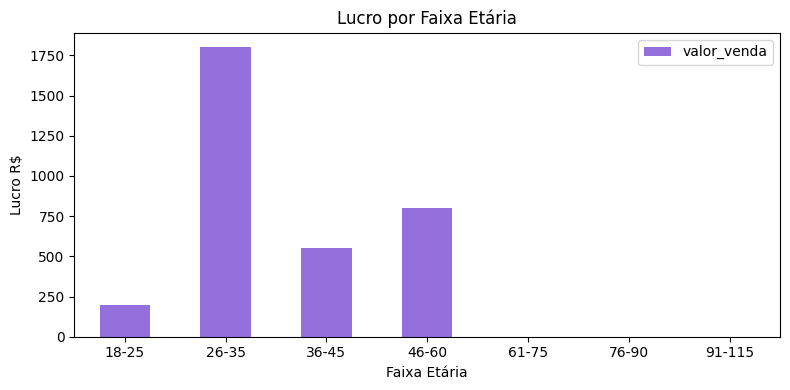

In [11]:
import matplotlib.pyplot as plt

lucro_faixa_etaria = clientes_vendas.groupby('faixa_etaria', observed=False)['valor_venda'].sum().reset_index()

# Colocando a faixa etária como índice
lucro_faixa_etaria.set_index('faixa_etaria', inplace=True)

# Plotando gráfico
ax = lucro_faixa_etaria.plot(kind='bar', color='mediumpurple', figsize=(8,4))

# Colocando os rótulos no eixo X horizontal
plt.xticks(rotation=0)

# Títulos e labels do gráfico
plt.title('Lucro por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Venda')

# Removendo o eixo Y 
ax.set_ylabel('Lucro R$')


plt.tight_layout() # Ajustando o layout para evitar sobreposição
plt.show()


Campanhas de marketing: Qual campanha teve o melhor ROI (Retorno sobre Investimento) nos últimos trimestres?

In [41]:
df_campanhas['ROI'] = df_campanhas['receita'] - df_campanhas['custo']
df_campanhas_ordenado = df_campanhas.sort_values(by='ROI', ascending=False)
df_campanhas_ordenado

,id_campanha,nome_campanha,custo,receita,data_lancamento,ROI,trimestre
7,108,Black Friday 2023,18000,70000,2023-11-15,52000,2023Q4
1,102,Black Friday 2022,15000,60000,2022-11-15,45000,2022Q4
4,105,Cyber Monday 2022,9000,40000,2022-11-28,31000,2022Q4
5,106,Páscoa 2023,8000,35000,2023-04-05,27000,2023Q2
2,103,Natal 2023,20000,45000,2023-12-10,25000,2023Q4
3,104,Verão 2022,12000,30000,2022-01-10,18000,2022Q1
0,101,Verão 2023,10000,25000,2023-01-05,15000,2023Q1
6,107,Festa Junina 2023,7000,20000,2023-06-10,13000,2023Q2


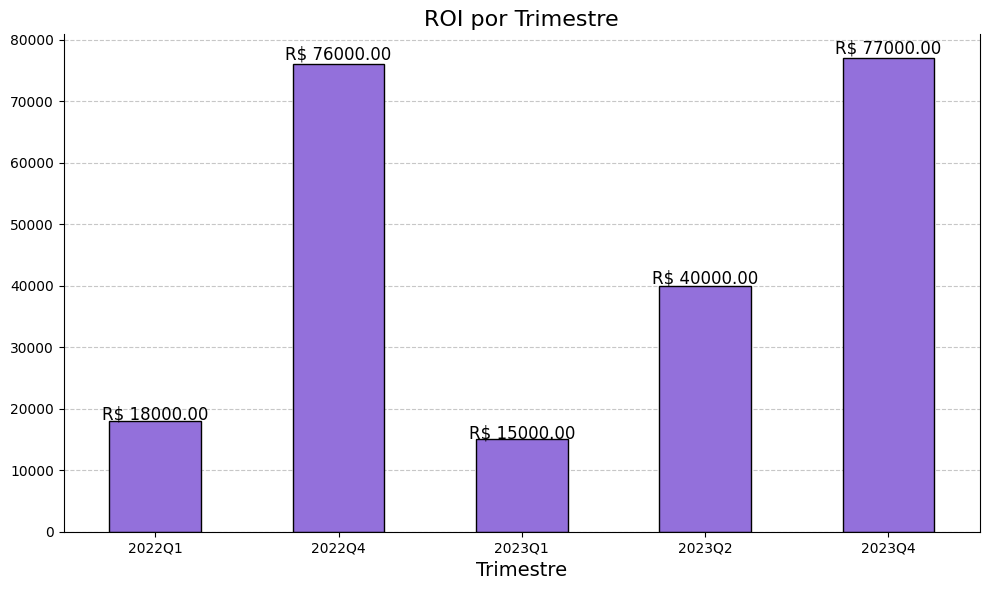

In [60]:
import matplotlib.pyplot as plt

df_campanhas['trimestre'] = df_campanhas['data_lancamento'].dt.to_period('Q')

# Agrupando ROI por trimestre
roi_por_trimestre = df_campanhas.groupby('trimestre')['ROI'].sum()

#criar o gráfico
plt.figure(figsize=(10,6))
ax = roi_por_trimestre.plot(kind='bar', color='mediumpurple', edgecolor='black')

for index, value in enumerate(roi_por_trimestre):
    plt.text(index, value + (value * 0.01), f'R$ {value:.2f}', ha='center', fontsize=12, color='black')


plt.title('ROI por Trimestre', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('ROI (em unidades)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.gca().set_axisbelow(True)

# Removendo o eixo Y 
ax.set_ylabel('')
plt.xticks(rotation = 0) # colando nomes na horizontal

ax.spines['top'].set_visible(False)   # Remove a linha superior

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Identificando produtos mais vendidos

In [77]:
# juntando a tabela de vendas com a de produtos
produtos_vendas = pd.merge(df_produtos, df_vendas, left_on='id_produto', right_on='id_produto', how='inner')

In [79]:
produtos_mais_vendidos = produtos_vendas['nome_produto'].value_counts()
produtos_mais_vendidos

nome_produto
Consultoria Básica    5
Anúncio Avançado      5
Branding Completo     5
Name: count, dtype: int64

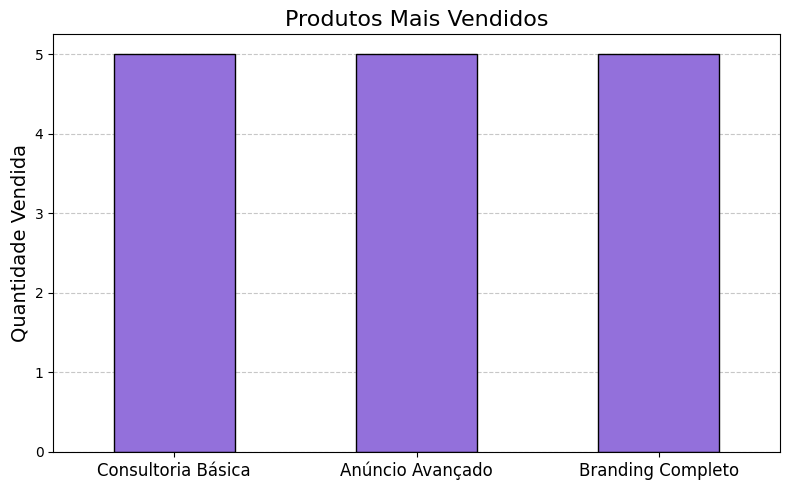

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = produtos_mais_vendidos.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Produtos Mais Vendidos', fontsize=16)
plt.ylabel('Quantidade Vendida', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.gca().set_axisbelow(True)
plt.xticks(rotation = 0) # colando nomes na horizontal

plt.tight_layout()
plt.show()


In [67]:
# Criando uma tupla com os valores monetários (Usar depois)

tupla_valores = tuple(rentabilidade_geografica['valor_venda'])

mediana_lucro = pd.Series(tupla_valores).median()
print(f'A médiana de lucro da empresa gira em torno de R$ {mediana_lucro}')

media_lucro = round(pd.Series(tupla_valores).mean(),2)
print(f'A média de lucro da empresa gira em torno de R$ {media_lucro}')

A médiana de lucro da empresa gira em torno de R$ 400.0
A média de lucro da empresa gira em torno de R$ 372.22
